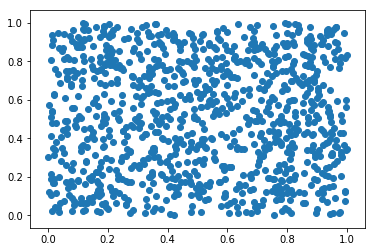

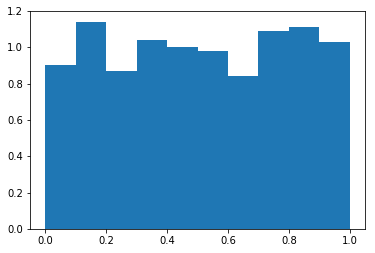

In [2]:
import matplotlib.pyplot as plt

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

plt.hist(random, density=True)
plt.show()

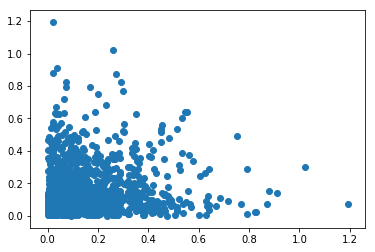

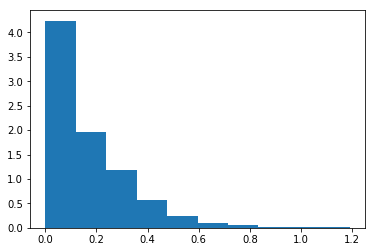

In [3]:
### task 1 
# Смоделировать выборку размера 1000 из распределения Exp(lambda)
# методом inverse transform. Нарисуйте выборочную гистограмму 
# и истинную плотность распределения.

import math

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def exp(l=6):    # пусть равно 6 
    return (-1/l) * math.log(1-rng())

random = [exp() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

plt.hist(random, density=True)
plt.show()

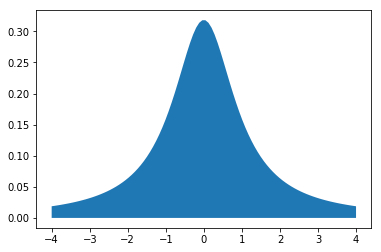

In [4]:
### task 2
# Строго обоснуйте метод rejection sampling. Смоделируйте выборку размера 
# 100 из распределения, заданного ниже, используя генератор равномерного 
# распределения.

from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

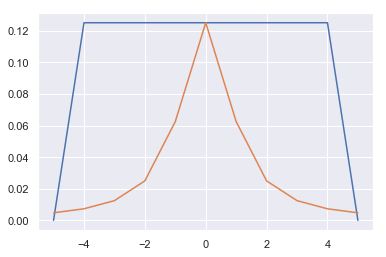

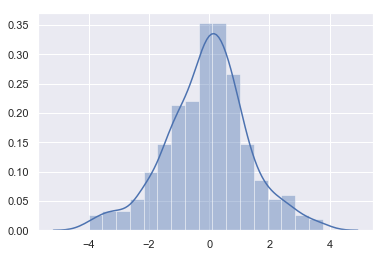

In [6]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

x = np.arange(-5, 6)

def q(x):
    return st.uniform.pdf(x,loc=-4,scale=8)
plt.plot(x,q(x))
def p(x):
    return (st.cauchy.pdf(x,loc=0,scale=1)*q(0))/ st.cauchy.pdf(0)
plt.plot(x, p(x))
plt.show()

def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.uniform(-4,4)
        u = np.random.uniform(0, q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

s = rejection_sampling(iter=1000)
sns.distplot(s)

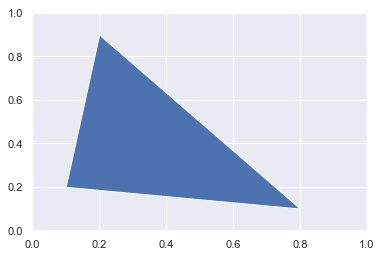

In [7]:
#task 3
# Смоделируйте выбору размера 100, равномерно распределенную внутри 
# заданного треугольника. Для этого моделируйте точки внутри единичного 
# квадрата и с помощию подходящего преобразования координат, переведите их 
# внутрь треугольника. Нанесите полученную выборку на рисунок

import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

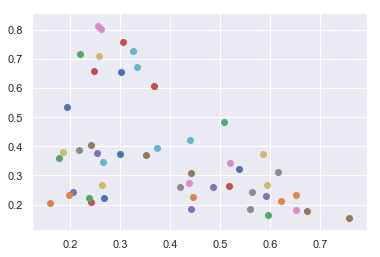

In [8]:
c = np.array([[0.1, 0.7],[0.7, -0.1]])
invc = np.linalg.inv(c)
o = [0.1,0.2]


def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

for i in range (100):
    random = [rng(),rng()]
    if random[1] <= 1-random[0]:     # y=1-x
        r = c.dot(random)+o    # преобразование координаты точки 
        plt.scatter(r[0],r[1])

plt.show()


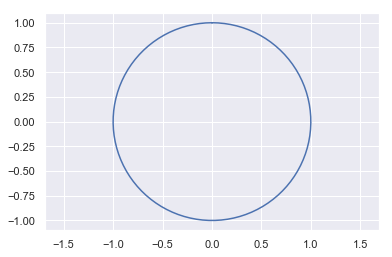

In [9]:
# task 4
# Смоделируйте выборку размера 500, равномерно распределенную внутри единичной
# окружности, не используя метод отбора. Нанесите полученную выборку на 
# рисунок.


from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()


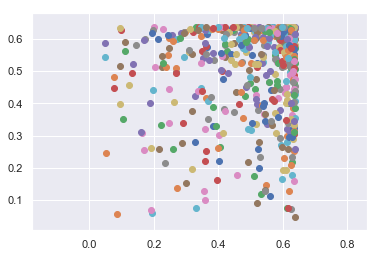

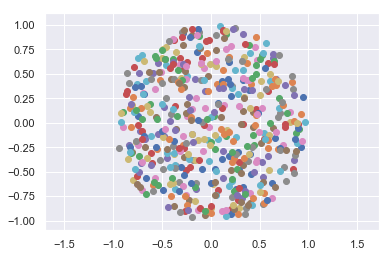

In [44]:
class uniformcircle(st.rv_continuous):
    "Uniform in circle distribution for one argument"
    def _pdf(self, x):
        return (2.0/math.pi)*math.sqrt(1.0-x**2) if -1.0 <= x <= 1.0 else 0.0
unf = uniformcircle()

def p(x):
    return unf.pdf(x)

for i in range(500):
    x=np.random.uniform(-1,1)
    y=np.random.uniform(-1,1)
    plt.scatter(p(x),p(y))
plt.axis('equal')
plt.show()

for i in range (500):
    a = np.random.uniform(0, 2*math.pi)
    ro = math.sqrt(np.random.uniform(0, 1))
    plt.scatter(ro*math.cos(a), ro*math.sin(a))
plt.axis('equal')
plt.show()

#Так и не осознал как ввести распределение, явно получается не равномерное
# сделал через полярные координаты - это можно же использовать? Или надо строго только через создание нового распределения ? 


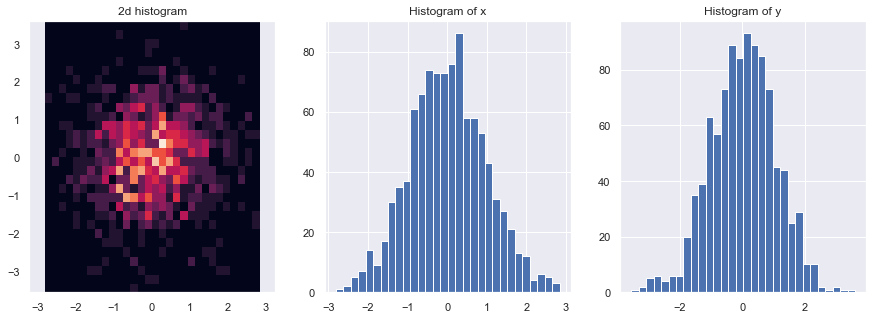

In [10]:
# task 5
# Докажите, что приведенный ниже алгоритм моделирует пары независимых 
# N(0,1) величин. Преобразуйте алгоритм, чтобы исключить обращение к 
# функциям np.sin и np.cos.

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

При такой полярной замене имеем: x^2+y^2=r^2, при этом r^2 = -2*ln(u1), где u1 распределена равномерно. Получается, что r распределена экпоненциально - обратная функция к функции exp распределения - это -ln(1-x)/lambda (или в данном случае из-за симметричности равномерного распределения -ln(x)/lambda). Так как X и Y независимы, то получаем сумму квадратов одинаково распределенных и независимых величин. А нам известно распределение хи-квадрат для k независимых нормальных величин, при котором для k=2 выходит экпоенциальное распределение. В общем-то в моделировании нормальных величин через равномерное распределение и полярную замену и заключается суть метода Бокса-Мюллера
       Алгоритм без синусов и косинусов:
Идея заключается в том, чтобы прибегать к равномерно распределенным точкам на [-1,1]\{0} и с условием попадания в круг задавать угол не прямо через новую переменную, а через деление на длину вектора


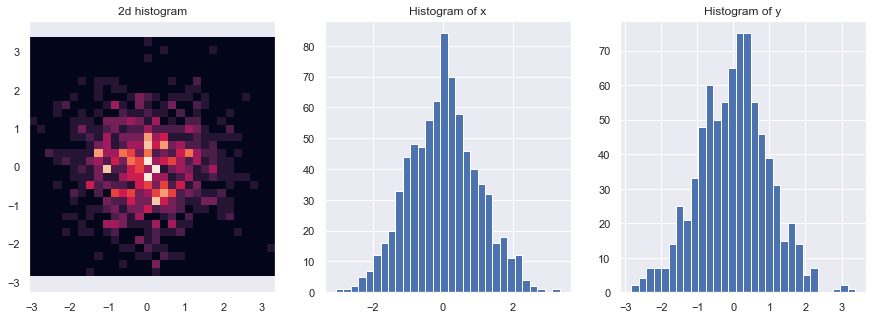

In [22]:
print("При такой полярной замене имеем: x^2+y^2=r^2, при этом r^2 = -2*ln(u1), где u1 распределена равномерно. Получается, что r распределена экпоненциально - обратная функция к функции exp распределения - это -ln(1-x)/lambda (или в данном случае из-за симметричности равномерного распределения -ln(x)/lambda). Так как X и Y независимы, то получаем сумму квадратов одинаково распределенных и независимых величин. А нам известно распределение хи-квадрат для k независимых нормальных величин, при котором для k=2 выходит экпоенциальное распределение. В общем-то в моделировании нормальных величин через равномерное распределение и полярную замену и заключается суть метода Бокса-Мюллера")
print("       Алгоритм без синусов и косинусов:")
print("Идея заключается в том, чтобы прибегать к равномерно распределенным точкам на [-1,1]\{0} и с условием попадания в круг задавать угол не прямо через новую переменную, а через деление на длину вектора")

n = 1000
x=[]
y=[]
for i in range(n):
    u1 = np.random.uniform(-1,1)  
    u2 = np.random.uniform(-1,1)  
    h = u1**2+u2**2
    if 0.0 < h < 1.0:
        x.append(u1 * np.sqrt((-2*np.log(h))/h))
        y.append(u2 * np.sqrt((-2*np.log(h))/h))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()


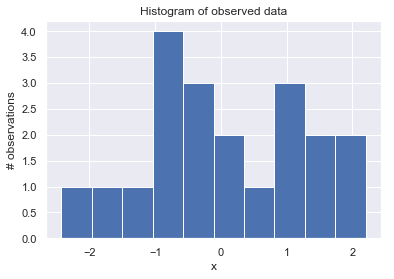

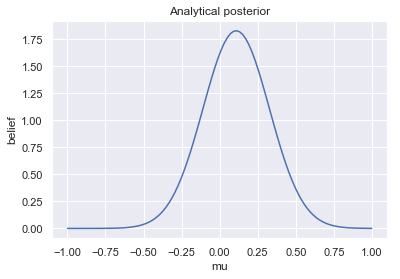

In [55]:
np.random.seed(123)
data = np.random.randn(20)

plt.hist(data)
plt.title('Histogram of observed data')
plt.xlabel('x'), plt.ylabel('# observations')
plt.show()

from scipy.stats import norm

mu_prior_mu = 0
mu_prior_sd = 1

def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)
ax = plt.subplot()
x = np.linspace(-1, 1, 100)
posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
plt.plot(x, posterior_analytical)
plt.xlabel('mu'), plt.ylabel('belief'), plt.title('Analytical posterior')
plt.show()


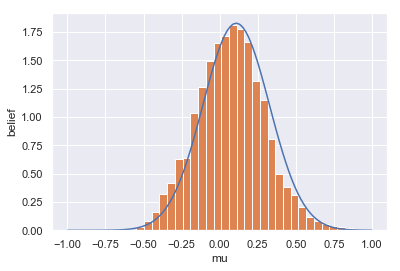

In [63]:
# task 6 


mu_current = 1
proposal_width = 0.07
m =[]

for i in range(5000):
    mu_proposal = norm(mu_current, proposal_width).rvs()

    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

    # Compute prior probability of current and proposed mu
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

    p_current = likelihood_current * prior_current
    p_proposal = likelihood_proposal * prior_proposal

    p_accept = min(1, p_proposal / p_current)

    accept = np.random.rand() < p_accept

    if accept:
        mu_current = mu_proposal
    m.append(mu_proposal)
    
ax = plt.subplot()
x = np.linspace(-1, 1, 100)
plt.plot(x, posterior_analytical)
plt.hist(m, density = True, bins = 30)
plt.xlabel('mu'), plt.ylabel('belief')
plt.show()